<a href="https://colab.research.google.com/github/Gauravgade3/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **Introduction**


**Why are the customers changes their telecom operator? How can we make long time business with customers? Which type of plans customers loves the most? And Why? Let us Explore, Analyze, and Find out the reasons.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading the CSV file of dataset
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Copy of Telecom Churn.csv')

# **Explore The Dataset**

In [ ]:
# Checking the first 10 rows
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
# Checking the last 10 rows 
df.tail(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# Checking basic information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# Exploring descriptive statistical parameter
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# **Data Cleaning**

In [ ]:
# Checking the null values if present
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

# **Analysis and Visualization**

In [ ]:
# Finding the total number of customers from each state
number_of_customers=df['State'].value_counts()
number_of_customers

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
NC     68
MT     68
NJ     68
CO     66
WA     66
NV     66
MS     65
RI     65
MA     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
DE     61
NE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

Text(0, 0.5, 'Number Of Customers')

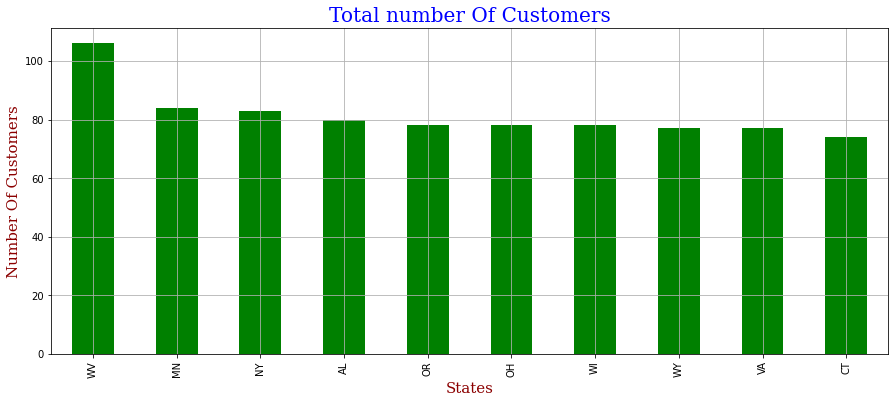

In [ ]:
# plotting the graph of number of customers from top 10 states
number_of_customers.head(10).plot(kind='bar',color='green')
plt.grid()
plt.rcParams['figure.figsize']=(15,6)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Total number Of Customers',fontdict=font1)
plt.xlabel('States',fontdict=font2)
plt.ylabel('Number Of Customers',fontdict=font2)

### **From this bar chart, we have find out number of customers from each state - West Virginia - 106, Minnesota - 84, New York - 83, Alabama - 80, Oregon - 78, Ohio - 78, Wisconsin - 78, Virginia - 77, Wyoming - 77, Connecticut - 74.**

In [ ]:
# Counting total customers according to Area code
code_counts=df['Area code'].value_counts()
code_counts

415    1655
510     840
408     838
Name: Area code, dtype: int64

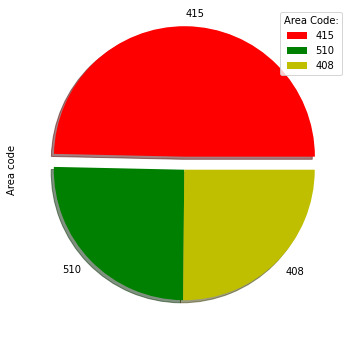

In [ ]:
# Plotting pie chart for code_counts
code_counts.plot(kind='pie',explode=[0.1,0,0],shadow=True,colors=['r','g','y'])
plt.legend(title='Area Code:')

### **With the help of this pie chart, we have number of customers according to the area code. It is clearly representing that the area code 415 having the most number of customers near about 50% of total customers also area code 408 have 840 customers and area code 510 have 838 customers.**

In [ ]:
# Find out number of customers according toarea code in each state
customer_by_code=df.groupby('State')['Area code'].value_counts().unstack()
customer_by_code

Area code,408,415,510
State,,,
AK,14,24,14
AL,25,40,15
AR,13,27,15
AZ,15,36,13
CA,7,17,10
CO,25,29,12
CT,22,39,13
DC,14,27,13
DE,13,31,17


Text(0, 0.5, 'Number Of Customers')

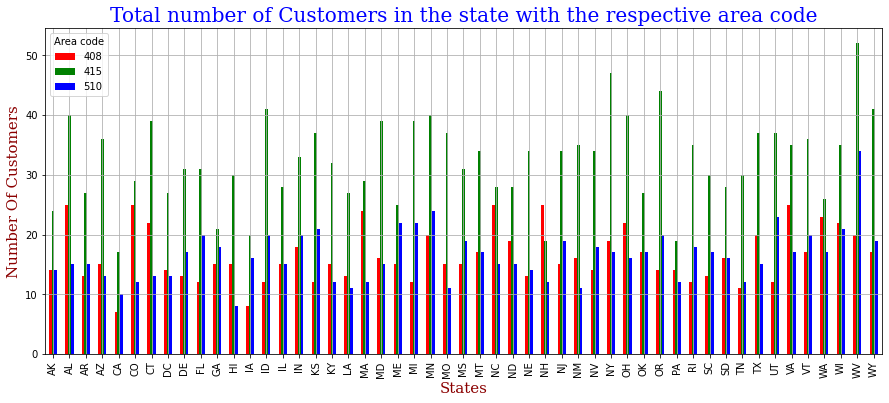

In [ ]:
# Plot subplot to check out total number of customers in the state with the respective area code
customer_by_code.plot(kind='bar',color=['r','g','b'])
plt.rcParams['figure.figsize']=(20,5)
plt.grid()
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Total number of Customers in the state with the respective area code',fontdict=font1)
plt.xlabel('States',fontdict=font2)
plt.ylabel('Number Of Customers',fontdict=font2)

### **Here we got the maximum number of customers according to area code - The area code 415 and 510 have maximum customers from West Virginia where the area code 408 have maximum number of cutomers from ALabama, Colorado, North Carolina, New Hampshire and Virginia.**

In [ ]:
# Overall Customers with International plan
int_plan=df['International plan'].value_counts()
int_plan

No     3010
Yes     323
Name: International plan, dtype: int64

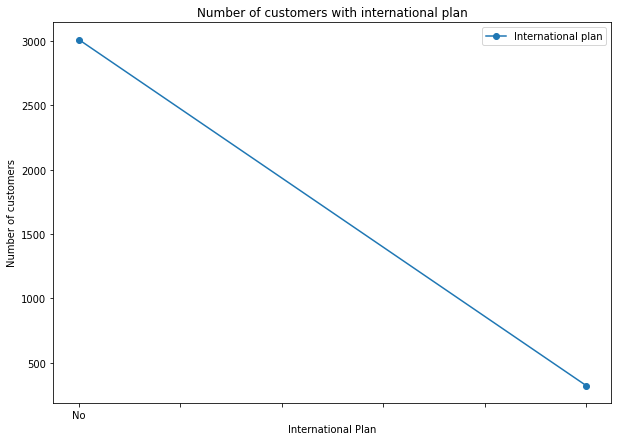

In [ ]:
int_plan.plot(kind='line',marker='o')
plt.xlabel('International Plan')
plt.ylabel('Number of customers')
plt.title('Number of customers with international plan')
plt.rcParams['figure.figsize']=(5,5)
plt.legend()

### **Out of 3333 customers, only 323 customers using international plan.**

In [ ]:
# Let us find out customers having international plan across all the states
df.groupby('State')['International plan'].value_counts().unstack()

International plan,No,Yes
State,,
AK,48.0,4.0
AL,72.0,8.0
AR,47.0,8.0
AZ,61.0,3.0
CA,30.0,4.0
CO,62.0,4.0
CT,66.0,8.0
DC,49.0,5.0
DE,51.0,10.0


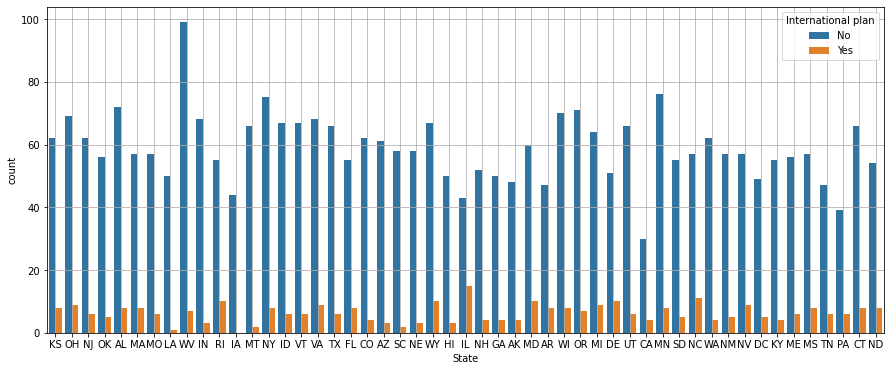

In [ ]:
# plot representing the customers with and without international plan across different states
sns.countplot(x='State',hue='International plan', data=df)
plt.grid()

### **From this plot we can say that Illinois have the maximum customers which are using international plan where Louisiana have negligible and Iowa have not any customers.** 

In [ ]:
# Counting customers using voice mail plan
customers_voice_mail_plan=df['Voice mail plan'].value_counts()
customers_voice_mail_plan

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

Text(0, 0.5, 'Number Of Customers')

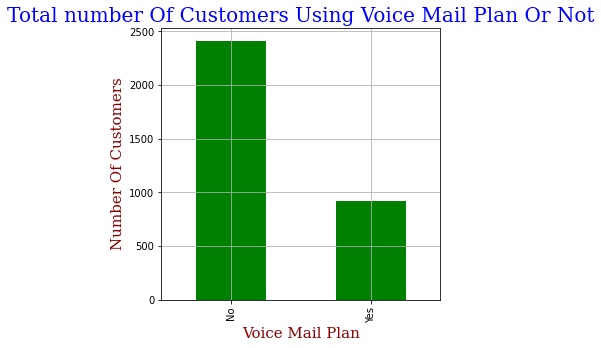

In [ ]:
# Plotting the bar graph to check either customers using voice mail plan or not
customers_voice_mail_plan.plot(kind='bar',color='g')
plt.grid()
plt.rcParams['figure.figsize']=(10,7)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Total number Of Customers Using Voice Mail Plan Or Not',fontdict=font1)
plt.xlabel('Voice Mail Plan',fontdict=font2)
plt.ylabel('Number Of Customers',fontdict=font2)

### **There are only 922 customers which are using voice mail plan in all state where 2411 customers are there which are not using the voice mail plan.**

In [ ]:
# Figure out total number of vmail messages per day
number_vmail=df.groupby('State')['Number vmail messages'].sum().sort_values()
number_vmail

State
WA    301
CA    306
PA    337
IA    343
TN    373
AR    396
NM    400
LA    403
KY    413
HI    417
DE    425
IL    428
NV    449
NH    463
TX    464
AK    471
RI    476
VT    478
OR    482
ME    490
MO    500
WY    502
NY    509
MA    514
SC    521
NE    522
DC    526
OK    528
KS    533
GA    541
VA    542
CO    552
MD    571
AL    574
IN    585
FL    596
AZ    606
UT    612
MS    614
MI    617
NC    618
NJ    625
SD    626
ND    633
MT    635
WI    646
CT    671
MN    694
ID    746
OH    795
WV    925
Name: Number vmail messages, dtype: int64

Text(0.5, 1.0, 'Number of vmail through different states per day')

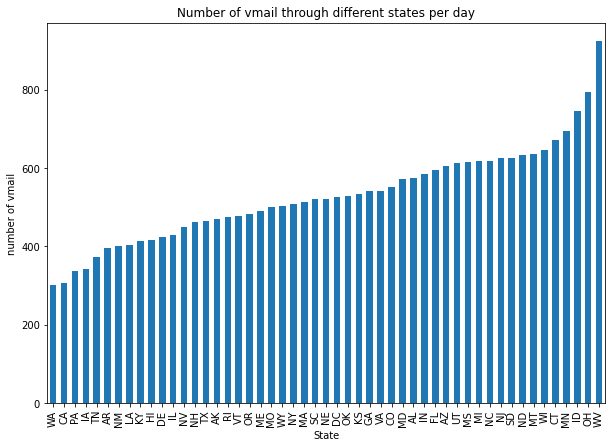

In [ ]:
# Using bar graph to show number of vmail in each country
number_vmail.plot(kind='bar',width=0.6)
plt.ylabel('number of vmail')
plt.title('Number of vmail through different states per day')

### **West Virginia have the highest number of vmails 925/day, Ohio have 795/day on second position where Washington have lowest number of vmails 301/day.**

In [ ]:
# Exploring max. and min. total day calls
total_day_calls_max=df.groupby('State')['Total day calls'].sum().sort_values(ascending=False).head()
total_day_calls_min=df.groupby('State')['Total day calls'].sum().sort_values(ascending=False).tail()
print(total_day_calls_max)
print(total_day_calls_min)

State
WV    11001
MN     8326
NY     8154
VA     8113
AL     7928
Name: Total day calls, dtype: int64
State
LA    5279
AK    4954
IA    4534
PA    4439
CA    3553
Name: Total day calls, dtype: int64


In [ ]:
# Exploring max. and min. total day charges
total_day_charge_max=df.groupby('State')['Total day charge'].sum().sort_values(ascending=False).head()
print(total_day_charge_max)
total_day_charge_min=df.groupby('State')['Total day charge'].sum().sort_values(ascending=False).tail()
print(total_day_charge_min)

State
WV    3134.67
MN    2618.36
AL    2529.72
NY    2470.94
OH    2430.29
Name: Total day charge, dtype: float64
State
DC    1573.31
LA    1546.56
PA    1441.10
IA    1328.60
CA    1061.01
Name: Total day charge, dtype: float64


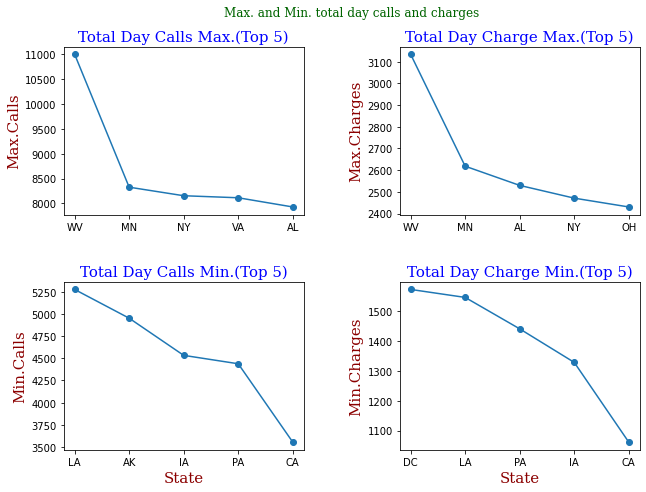

In [ ]:
# Subplots for max. and min. total day calls and charges
font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
font3 = {'family':'serif','color':'darkgreen','size':15}

# Max.Calls
plt.subplot(2,2,1)
plt.plot(total_day_calls_max,marker='o')
plt.title('Total Day Calls Max.(Top 5)',fontdict=font1)
plt.ylabel('Max.Calls',fontdict=font2)

# Max. Charges
plt.subplot(2,2,2)
plt.plot(total_day_charge_max,marker='o')
plt.title('Total Day Charge Max.(Top 5)',fontdict=font1)
plt.ylabel('Max.Charges',fontdict=font2)

# Min. Calls
plt.subplot(2,2,3)
plt.plot(total_day_calls_min,marker='o')
plt.xlabel('State',fontdict=font2)
plt.title('Total Day Calls Min.(Top 5)',fontdict=font1)
plt.ylabel('Min.Calls',fontdict=font2)

# Min. Charges
plt.subplot(2,2,4)
plt.plot(total_day_charge_min,marker='o')
plt.xlabel('State',fontdict=font2)
plt.title('Total Day Charge Min.(Top 5)',fontdict=font1)
plt.ylabel('Min.Charges',fontdict=font2)
plt.suptitle('Max. and Min. total day calls and charges',fontdict=font3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### **West Virginia, Minnesota, New York, Virginia and Alabama are the top 5 states having maximum number of total day calls and West Virginia, Minnesota, Alabama, New York, Ohio are for charges where Louisiana, Alaska, Iowa, Pennsylvania, California are the top 5 states having minimum number of total day calls where DC, Louisiana, Pennsylvinia, Iowa, California are for charges.** 

In [ ]:
# Exploring max. and min. total eve calls
total_eve_calls_max=df.groupby('State')['Total eve calls'].sum().sort_values(ascending=False).head()
total_eve_calls_min=df.groupby('State')['Total eve calls'].sum().sort_values(ascending=False).tail()
print(total_eve_calls_max)
print(total_eve_calls_min)

State
WV    10394
MN     8538
NY     8302
OH     7894
AL     7877
Name: Total eve calls, dtype: int64
State
AK    5022
LA    4928
PA    4573
IA    4380
CA    3505
Name: Total eve calls, dtype: int64


In [ ]:
# Exploring max. and min. total eve charges
total_eve_charge_max=df.groupby('State')['Total eve charge'].sum().sort_values(ascending=False).head()
print(total_eve_charge_max)
total_eve_charge_min=df.groupby('State')['Total eve charge'].sum().sort_values(ascending=False).tail()
print(total_eve_charge_min)

State
WV    1697.56
MN    1423.27
NY    1389.79
OH    1368.73
WY    1347.14
Name: Total eve charge, dtype: float64
State
LA    857.58
AK    814.54
IA    771.95
PA    733.06
CA    575.06
Name: Total eve charge, dtype: float64


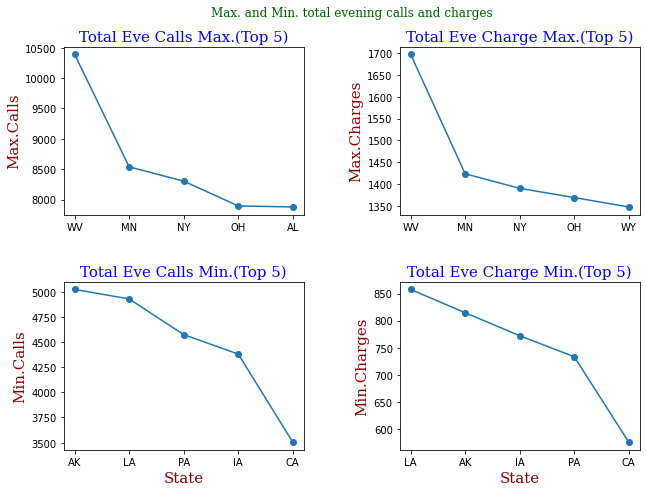

In [ ]:
# Subplots for max. and min. total eve calls and charges

# Max.Calls
plt.subplot(2,2,1)
plt.plot(total_eve_calls_max,marker='o')
plt.title('Total Eve Calls Max.(Top 5)',fontdict=font1)
plt.ylabel('Max.Calls',fontdict=font2)

# Max. Charges
plt.subplot(2,2,2)
plt.plot(total_eve_charge_max,marker='o')
plt.title('Total Eve Charge Max.(Top 5)',fontdict=font1)
plt.ylabel('Max.Charges',fontdict=font2)

# Min. Calls
plt.subplot(2,2,3)
plt.plot(total_eve_calls_min,marker='o')
plt.xlabel('State',fontdict=font2)
plt.title('Total Eve Calls Min.(Top 5)',fontdict=font1)
plt.ylabel('Min.Calls',fontdict=font2)

# Min. Charges
plt.subplot(2,2,4)
plt.plot(total_eve_charge_min,marker='o')
plt.xlabel('State',fontdict=font2)
plt.title('Total Eve Charge Min.(Top 5)',fontdict=font1)
plt.ylabel('Min.Charges',fontdict=font2)
plt.suptitle('Max. and Min. total evening calls and charges',fontdict=font3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### **West Virginia, Minnesota, New York, Ohio, Alabama are the top 5 states having maximum number of total evening calls and West virginia, Minnesota, New York, Ohio, Wyoming are for charges where louisiana, Alaska, Pennsyilvia, Iowa, California are the top 5 states having minimum number of total calls and Louisiana, Alaska, Iowa, Pennsylvia, California are for charges.**

In [ ]:
# Exploring max. and min. total night calls
total_night_calls_max=df.groupby('State')['Total night calls'].sum().sort_values(ascending=False).head()
total_night_calls_min=df.groupby('State')['Total night calls'].sum().sort_values(ascending=False).tail()
print(total_night_calls_max)
print(total_night_calls_min)

State
WV    10660
MN     8579
NY     8251
OH     8054
OR     8009
Name: Total night calls, dtype: int64
State
AK    5062
TN    4996
PA    4451
IA    4406
CA    3373
Name: Total night calls, dtype: int64


In [ ]:
# Exploring max. and min. total night charges
total_night_charge_max=df.groupby('State')['Total night charge'].sum().sort_values(ascending=False).head()
print(total_night_charge_max)
total_night_charge_min=df.groupby('State')['Total night charge'].sum().sort_values(ascending=False).tail()
print(total_night_charge_min)

State
WV    959.06
MN    792.59
NY    759.26
VA    737.95
OH    717.75
Name: Total night charge, dtype: float64
State
LA    462.20
AK    450.05
PA    396.66
IA    379.19
CA    303.72
Name: Total night charge, dtype: float64


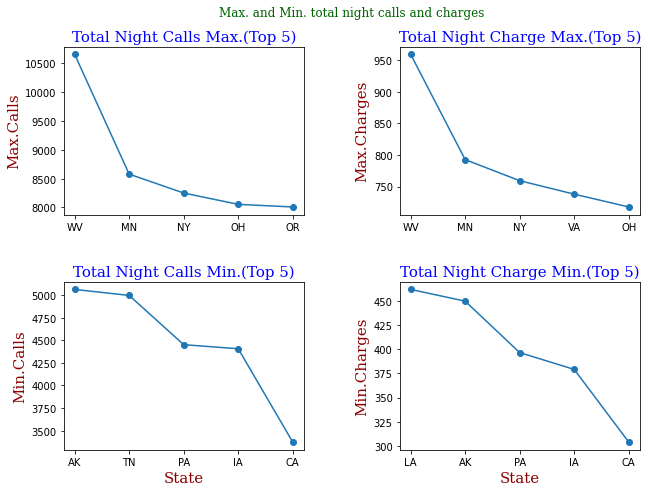

In [ ]:
# Subplots for max. and min. total night calls and charges

# Max.Calls
plt.subplot(2,2,1)
plt.plot(total_night_calls_max,marker='o')
plt.title('Total Night Calls Max.(Top 5)',fontdict=font1)
plt.ylabel('Max.Calls',fontdict=font2)

# Max. Charges
plt.subplot(2,2,2)
plt.plot(total_night_charge_max,marker='o')
plt.title('Total Night Charge Max.(Top 5)',fontdict=font1)
plt.ylabel('Max.Charges',fontdict=font2)

# Min. Calls
plt.subplot(2,2,3)
plt.plot(total_night_calls_min,marker='o')
plt.xlabel('State',fontdict=font2)
plt.title('Total Night Calls Min.(Top 5)',fontdict=font1)
plt.ylabel('Min.Calls',fontdict=font2)

# Min. Charges
plt.subplot(2,2,4)
plt.plot(total_night_charge_min,marker='o')
plt.xlabel('State',fontdict=font2)
plt.title('Total Night Charge Min.(Top 5)',fontdict=font1)
plt.ylabel('Min.Charges',fontdict=font2)
plt.suptitle('Max. and Min. total night calls and charges',fontdict=font3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4) 

### **West Nigeria, Minnesota, New York, Ohio, Oregon are the top 5 states having maximum number of total night calls and West Nigeria, Minnesota, New York, Virginia, Ohio are for charges where Alaska, Tenessee, Pennsylvia, Iowa, California are the top 5 states having maximum number of total calls Louisiana, Alaska, Pennsylvia, Iowa, California are for charges.**

In [ ]:
# Exploring max. and min. total intl calls
total_intl_calls_max=df.groupby('State')['Total intl calls'].sum().sort_values(ascending=False).head()
total_intl_calls_min=df.groupby('State')['Total intl calls'].sum().sort_values(ascending=False).tail()
print(total_intl_calls_max)
print(total_intl_calls_min)

State
WV    468
NY    385
WY    383
AL    376
VA    365
Name: Total intl calls, dtype: int64
State
GA    219
DC    211
IA    208
PA    174
CA    151
Name: Total intl calls, dtype: int64


In [ ]:
# Exploring max. and min. total intl charges
total_intl_charge_max=df.groupby('State')['Total intl charge'].sum().sort_values(ascending=False).head()
print(total_intl_charge_max)
total_intl_charge_min=df.groupby('State')['Total intl charge'].sum().sort_values(ascending=False).tail()
print(total_intl_charge_min)

State
WV    288.19
MN    236.97
NY    223.78
AL    222.32
VA    220.55
Name: Total intl charge, dtype: float64
State
AK    140.68
LA    128.53
PA    127.47
IA    114.95
CA     90.63
Name: Total intl charge, dtype: float64


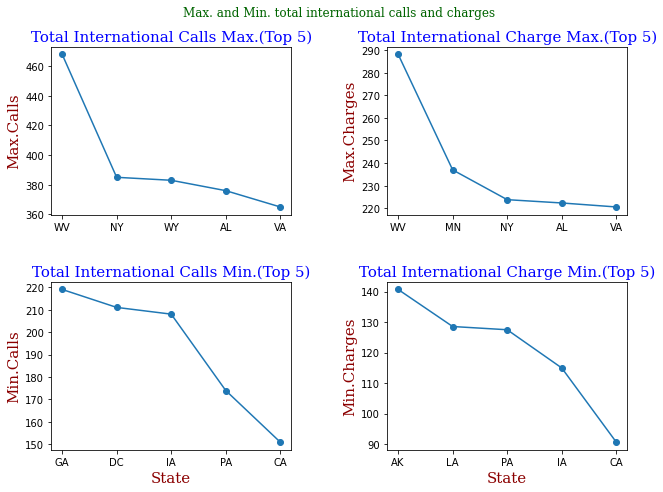

In [ ]:
# Subplots for max. and min. intl night calls and charges

# Max.Calls
plt.subplot(2,2,1)
plt.plot(total_intl_calls_max,marker='o')
plt.title('Total International Calls Max.(Top 5)',fontdict=font1)
plt.ylabel('Max.Calls',fontdict=font2)

# Max. Charges
plt.subplot(2,2,2)
plt.plot(total_intl_charge_max,marker='o')
plt.title('Total International Charge Max.(Top 5)',fontdict=font1)
plt.ylabel('Max.Charges',fontdict=font2)

# Min. Calls
plt.subplot(2,2,3)
plt.plot(total_intl_calls_min,marker='o')
plt.xlabel('State',fontdict=font2)
plt.title('Total International Calls Min.(Top 5)',fontdict=font1)
plt.ylabel('Min.Calls',fontdict=font2)

# Min. Charges
plt.subplot(2,2,4)
plt.plot(total_intl_charge_min,marker='o')
plt.xlabel('State',fontdict=font2)
plt.title('Total International Charge Min.(Top 5)',fontdict=font1)
plt.ylabel('Min.Charges',fontdict=font2)
plt.suptitle('Max. and Min. total international calls and charges',fontdict=font3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### **West Virginia, New York, Wyoming, Alaska, Virginia are the top 5 states having maximum number of total calls and West Virginia, Minnesota, New York, Alaska, Virginiaare for charges where Georgia, DC, Iowa, Pennsylvia, California are the top 5 states having maximum number of total calls and Alaska, Louisiana, Pennsylvia, Iowa, California are for charges.**

In [ ]:
# Compairing call duration to find out most preffered time slot for call
highest_call_duration=df[['Total day minutes','Total eve minutes','Total night minutes']].sum()
highest_call_duration

Total day minutes      599190.4
Total eve minutes      669867.5
Total night minutes    669506.5
dtype: float64

Text(0.5, 0, 'Call Duration')

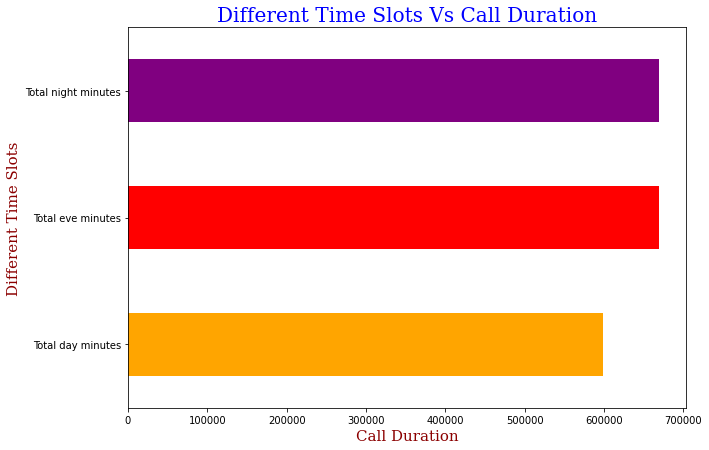

In [ ]:
# Showing comparison of different call time slots using horizontal bars
highest_call_duration.plot(kind='barh',color=['orange','red','purple'])
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Different Time Slots Vs Call Duration',fontdict=font1)
plt.ylabel('Different Time Slots',fontdict=font2)
plt.xlabel('Call Duration',fontdict=font2)

### **Most of the calls are at evening time (669867.5 min.) also the night time is nearly equal to it (669506.5 min.). But the day time calls are comparatively low (599190.4 min.) than both of these.**

In [ ]:
# Compairing call charges to find out most profitable time slot for call
highest_call_charges=df[['Total day charge','Total eve charge','Total night charge']].sum()
highest_call_charges

Total day charge      101864.17
Total eve charge       56939.44
Total night charge     30128.07
dtype: float64

Text(0.5, 0, 'Call Charges')

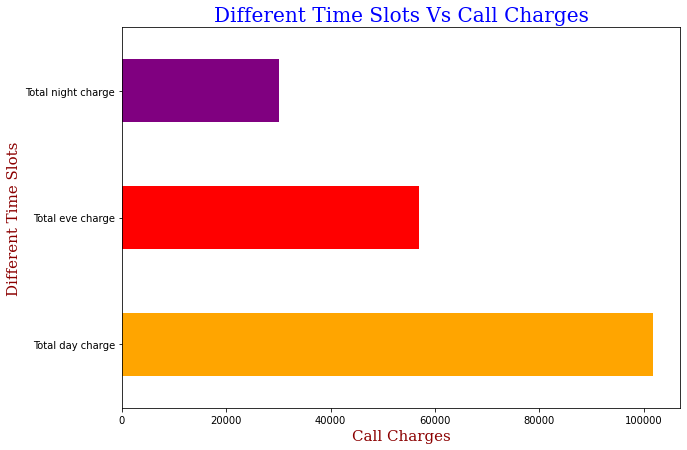

In [ ]:
# Showing comparison of different call charges using horizontal bars
highest_call_charges.plot(kind='barh',color=['orange','red','purple'])
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Different Time Slots Vs Call Charges',fontdict=font1)
plt.ylabel('Different Time Slots',fontdict=font2)
plt.xlabel('Call Charges',fontdict=font2)

### **Now, from this bar chart we can say that most profitable time slot for calls is day time even if the call duration of the day time calls is lower as compared to other time slots. Where the lowest profit comes through night calls even if call duration is more for that time.**

In [ ]:
# Let us find out number of customer service calls through different state
Customer_service_calls=df.groupby('State')['Customer service calls'].sum().sort_values(ascending=False)
Customer_service_calls

State
WV    159
NY    142
OR    135
MN    130
VT    127
AL    125
VA    123
ID    122
IN    120
MD    119
MI    119
CO    118
TX    116
NJ    114
CT    112
WY    111
WI    111
MT    111
MS    110
AR    109
OK    109
ME    108
NC    106
OH    106
NV    105
GA    104
AZ    102
WA    101
KY    101
NM     99
UT     99
DE     99
FL     99
MO     98
KS     97
SC     95
RI     92
ND     90
NE     89
NH     85
SD     84
HI     82
AK     81
LA     80
MA     79
DC     73
IA     70
TN     70
IL     66
PA     57
CA     50
Name: Customer service calls, dtype: int64

Text(0.5, 0, 'State')

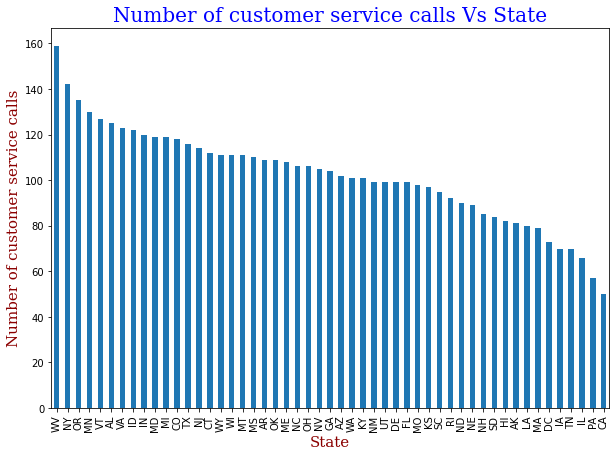

In [ ]:
# Plotting customer service calls across all the state
Customer_service_calls.plot(kind='bar')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Number of customer service calls Vs State',fontdict=font1)
plt.ylabel('Number of customer service calls',fontdict=font2)
plt.xlabel('State',fontdict=font2)

### **With the help of this figure we can conclude that West Virginia have more number of customer service calls where california have the lowest among all the states.**